In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 # to load in images
%matplotlib inline

In [217]:
ae = tf.keras.models.load_model('./best_7-25.h5')

In [218]:
encoder = tf.keras.models.Model(inputs=ae.input, outputs=ae.get_layer(name='encoder_output').output)

(2663, 1997, 3)

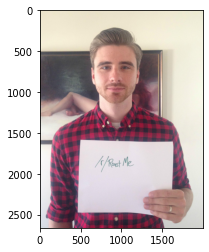

In [235]:
img = cv2.imread('./faces/4re2dn.png')
plt.imshow(to_rgb(img))
img.shape

In [228]:
haar_cascade_face = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

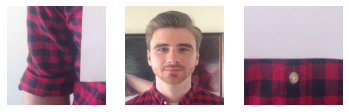

In [236]:
def detect_faces(img, extension=(0,0), resize=(256,256), draw_rects=True):
    img_gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY) # cvt to grayscale for faster results
    
    if type(extension)==float or type(extension)==int:
        extension = (extension, extension)
    if extension[0]<1 or extension[1]<1:
        extension = (int(extension[0]*len(img[0])), int(extension[1]*len(img))) # if <1, treat as a perecentage
    
    faces_rects = haar_cascade_face.detectMultiScale(img_gray, scaleFactor = 1.2, minNeighbors = 5)
    if len(faces_rects) == 0:
        return None, None
    if draw_rects: # should we draw the rectangles onto the original image?
        for (x,y,w,h) in faces_rects:
            left_x = int(max(x-extension[0]/2,0))
            right_x = int(min(x+(extension[0]/2)+w,len(img[0])))
            top_y = int(max(y-extension[1]/2,0))
            bottom_y = int(min(y+(extension[1]/2)+h, len(img)))
            cv2.rectangle(img_gray, (left_x,bottom_y), (right_x,top_y), (0, 255, 0), 10)
    face_imgs = []
    for (x,y,w,h) in faces_rects:
        left_x = int(max(x-extension[0]/2,0))
        right_x = int(min(x+(extension[0]/2)+w,len(img[0])))
        bottom_y = int(max(y-extension[1]/2,0))
        top_y = int(min(y+(extension[1]/2)+h, len(img)))
        img_slice = img[bottom_y:top_y, left_x:right_x]
        face_imgs.append(cv2.resize(img_slice,resize))
    return face_imgs, img_gray

def to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def display_faces(imgs):
    if imgs is not None:
        for c,face in enumerate(imgs):
            plt.subplot(1,len(imgs),c+1)
            plt.axis('off')
            plt.imshow(to_rgb(face))
    else:
        print('Face not found!')
        
face_imgs, im_gray = detect_faces(img, extension=.2, draw_rects=True)  
display_faces(face_imgs)

In [242]:
img = to_rgb(face_imgs[1])

In [238]:
def encode_vals(img):
    img = img / 255.
    img = img.reshape((1, 256, 256, 3))
    return encoder.predict(img)[0]

def autoencoder_predict(img):
    img = img / 255.
    img = img.reshape((1, 256, 256, 3))
    return ae.predict(img)[0]

In [243]:
encode_vals(img)

array([-1.9993508e-01,  4.8291028e-01, -8.7110591e-01, -1.0626467e+00,
        1.3690475e+00,  1.6419026e+00, -1.3500191e+00,  2.4047449e+00,
       -6.3137405e-02, -2.2397490e+00, -7.1264410e-01, -9.5904952e-01,
        2.7852501e-03,  9.7705841e-01,  6.6556978e-01,  4.5120388e-01,
       -6.6097337e-01, -4.0548347e-02, -1.4779694e+00, -1.1824995e+00,
        2.8886151e-01, -1.1663266e+00, -1.8391526e-01, -2.0730071e+00,
       -9.9855834e-01, -9.3095064e-01, -1.4433893e+00,  7.1137899e-01,
        7.9292917e-01, -7.4236214e-02, -1.2854220e+00, -2.1086352e+00,
       -6.5439379e-01,  7.9771090e-01, -3.1164434e+00, -3.0113357e-01,
        8.2884812e-01,  1.7395817e-01,  7.0854425e-02,  6.5652651e-01,
        1.2616109e+00, -1.1331819e+00,  3.8132650e-01,  1.6768159e+00,
        3.7834013e-01,  9.6039522e-01, -1.3920242e+00,  8.4988445e-01,
       -1.8531695e-01,  1.7742945e+00, -1.0017607e+00, -7.3060191e-01,
        3.1191781e-01,  1.8812089e+00,  1.4111564e+00, -7.6790857e-01,
      

In [244]:
type(.2)

float

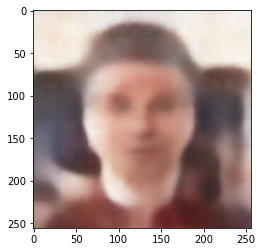

In [245]:
plt.imshow(autoencoder_predict(img))